<a href="https://colab.research.google.com/github/rodrfentanes21/Lista7-IA/blob/main/extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
customer_data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


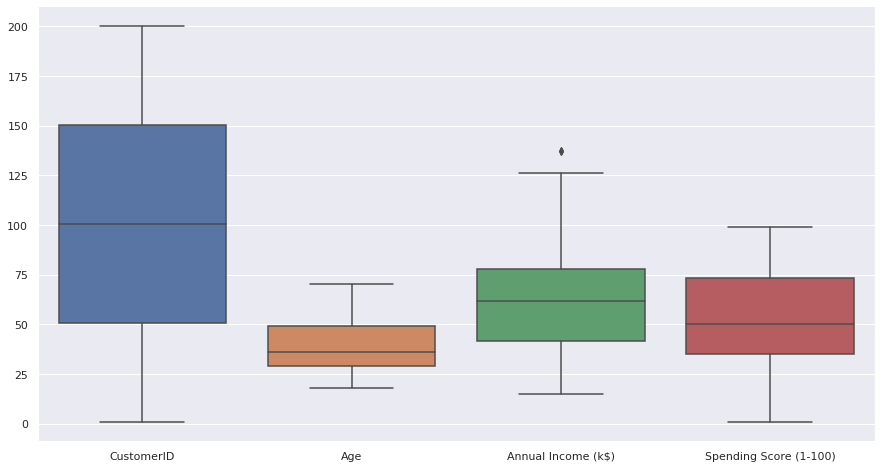

In [14]:
plt.figure(figsize=[15,8])
sns.boxplot(data=customer_data)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

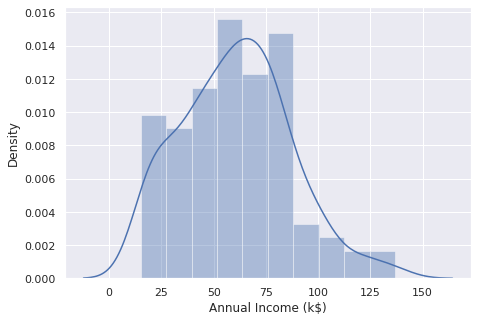

In [19]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(customer_data['Annual Income (k$)'])
plt.show()

In [31]:
print("Maior Aceito",customer_data['Annual Income (k$)'].mean() + 1.5*customer_data['Annual Income (k$)'].std())
print("Menor Aceito",customer_data['Annual Income (k$)'].mean() - 1.5*customer_data['Annual Income (k$)'].std())

Maior Aceito 99.95708174790687
Menor Aceito 21.162918252093135


In [32]:
customer_data[(customer_data['Annual Income (k$)'] > 99.95) | (customer_data['Annual Income (k$)'] < 21.16)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [33]:
new_customer_data = customer_data[(customer_data['Annual Income (k$)'] < 99.95) & (customer_data['Annual Income (k$)'] > 21.16)]
customer_data = new_customer_data
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,19,Male,52,23,29
19,20,Female,35,23,98
20,21,Male,35,24,35
21,22,Male,25,24,73
22,23,Female,46,25,5
...,...,...,...,...,...
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39


In [34]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
18,19,Male,52,23,29
19,20,Female,35,23,98
20,21,Male,35,24,35
21,22,Male,25,24,73
22,23,Female,46,25,5


In [35]:
customer_data.shape

(168, 5)

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 18 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              168 non-null    int64 
 1   Gender                  168 non-null    object
 2   Age                     168 non-null    int64 
 3   Annual Income (k$)      168 non-null    int64 
 4   Spending Score (1-100)  168 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
X = customer_data.iloc[:,[3,4]].values

print(X)

[[23 29]
 [23 98]
 [24 35]
 [24 73]
 [25  5]
 [25 73]
 [28 14]
 [28 82]
 [28 32]
 [28 61]
 [29 31]
 [29 87]
 [30  4]
 [30 73]
 [33  4]
 [33 92]
 [33 14]
 [33 81]
 [34 17]
 [34 73]
 [37 26]
 [37 75]
 [38 35]
 [38 92]
 [39 36]
 [39 61]
 [39 28]
 [39 65]
 [40 55]
 [40 47]
 [40 42]
 [40 42]
 [42 52]
 [42 60]
 [43 54]
 [43 60]
 [43 45]
 [43 41]
 [44 50]
 [44 46]
 [46 51]
 [46 46]
 [46 56]
 [46 55]
 [47 52]
 [47 59]
 [48 51]
 [48 59]
 [48 50]
 [48 48]
 [48 59]
 [48 47]
 [49 55]
 [49 42]
 [50 49]
 [50 56]
 [54 47]
 [54 54]
 [54 53]
 [54 48]
 [54 52]
 [54 42]
 [54 51]
 [54 55]
 [54 41]
 [54 44]
 [54 57]
 [54 46]
 [57 58]
 [57 55]
 [58 60]
 [58 46]
 [59 55]
 [59 41]
 [60 49]
 [60 40]
 [60 42]
 [60 52]
 [60 47]
 [60 50]
 [61 42]
 [61 49]
 [62 41]
 [62 48]
 [62 59]
 [62 55]
 [62 56]
 [62 42]
 [63 50]
 [63 46]
 [63 43]
 [63 48]
 [63 52]
 [63 54]
 [64 42]
 [64 46]
 [65 48]
 [65 50]
 [65 43]
 [65 59]
 [67 43]
 [67 57]
 [67 56]
 [67 40]
 [69 58]
 [69 91]
 [70 29]
 [70 77]
 [71 35]
 [71 95]
 [71 11]
 

In [39]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

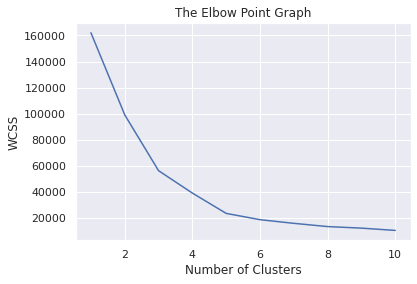

In [40]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


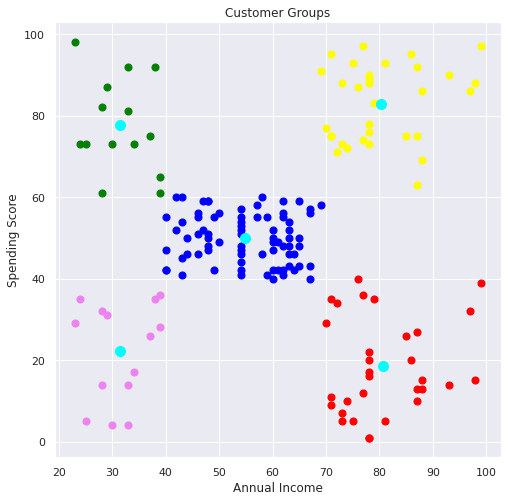

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()